In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/workspaces/Intermediate-Data-Science-Projects/Retail-Demand-Forecasting/dataset/E-commerce Shopping Dataset.csv")

In [3]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (3000, 17)
Columns: Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_date',
       'product_category', 'product_price', 'quantity', 'payment_method',
       'delivery_status', 'city', 'state', 'zipcode', 'product_id',
       'discount_applied', 'order_value', 'review_rating', 'return_requested'],
      dtype='object')


In [5]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Unnamed: 0            0
order_id              0
customer_id           0
order_date            0
product_category      0
product_price         0
quantity              0
payment_method        0
delivery_status       0
city                  0
state                 0
zipcode               0
product_id            0
discount_applied      0
order_value           0
review_rating       130
return_requested      0
dtype: int64


In [6]:
print("\nData types:")
print(df.dtypes)


Data types:
Unnamed: 0                   int64
order_id                    object
customer_id                 object
order_date          datetime64[ns]
product_category            object
product_price              float64
quantity                     int64
payment_method              object
delivery_status             object
city                        object
state                       object
zipcode                      int64
product_id                  object
discount_applied           float64
order_value                float64
review_rating              float64
return_requested              bool
dtype: object


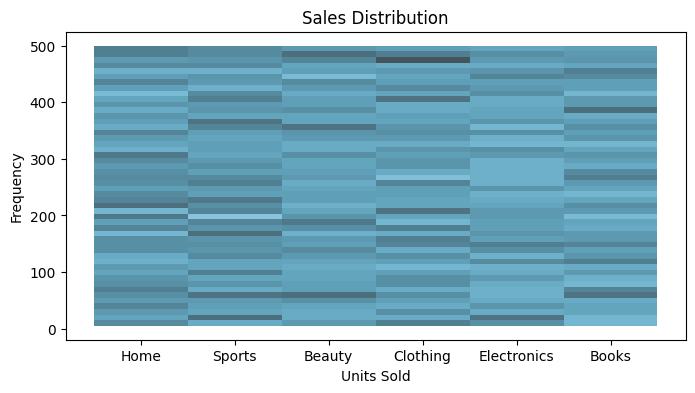

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(y=df['product_price'],x=df['product_category'] ,bins=50, kde=True, color='skyblue')
plt.title("Sales Distribution")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()

In [8]:
sales_by_date = df.groupby('order_date')['product_price'].sum().reset_index()

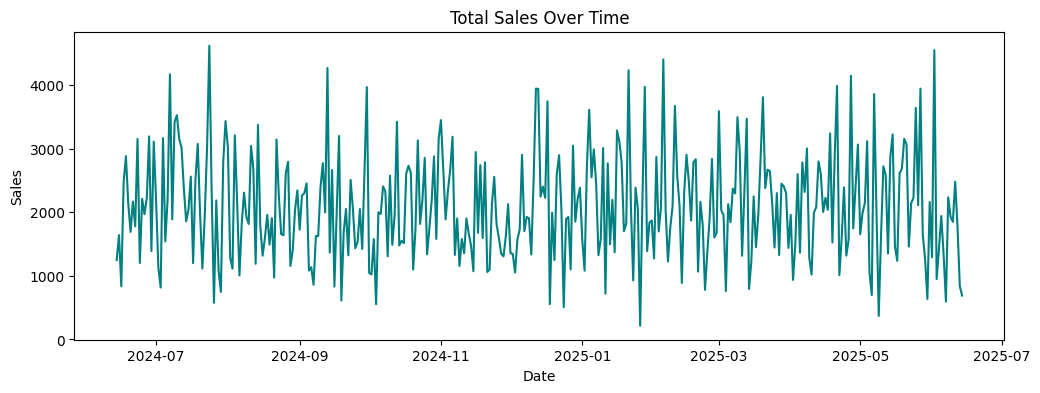

In [9]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=sales_by_date, x='order_date', y='product_price', color='teal')
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [10]:
sales_by_store = df.groupby('product_category')['product_price'].sum().reset_index()

/tmp/ipykernel_31178/3643383952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_store, x='product_category', y='product_price', palette='viridis')


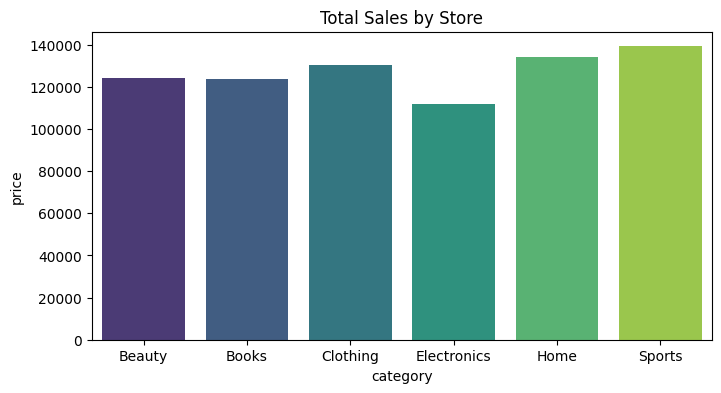

In [11]:
plt.figure(figsize=(8, 4))
sns.barplot(data=sales_by_store, x='product_category', y='product_price', palette='viridis')
plt.title("Total Sales by Store")
plt.xlabel("category")
plt.ylabel("price")
plt.show()

In [12]:
top_items = df.groupby('product_category')['order_value'].sum().sort_values(ascending=False).head(10)

/tmp/ipykernel_31178/2259273759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette='magma')


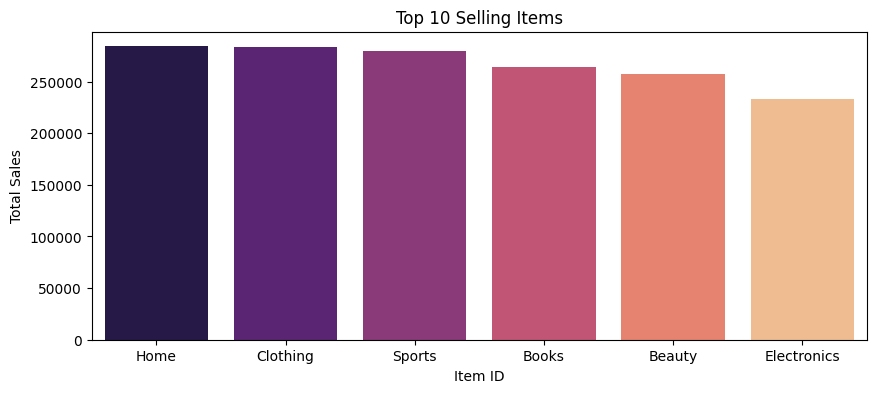

In [13]:
plt.figure(figsize=(10, 4))
sns.barplot(x=top_items.index, y=top_items.values, palette='magma')
plt.title("Top 10 Selling Items")
plt.xlabel("Item ID")
plt.ylabel("Total Sales")
plt.show()